In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from konlpy.tag import Okt

import tensorflow as tf

In [38]:
fp = './project_data_all3.json'
df = pd.read_json(fp)

In [39]:
df['category'] = df['category'].replace({'가사': 0, '형사': 1, '특허': 2, '민사': 3, '일반행정': 4, '세무': 5})

In [40]:
target = df['category'].values
data = df['abstractive'].values

In [41]:
okt = Okt()

pos_results = okt.pos(data[0][0], norm=True, stem=True)

In [42]:
pos_results

[('취소소송', 'Noun'),
 ('은', 'Josa'),
 ('처분', 'Noun'),
 ('등', 'Noun'),
 ('이', 'Josa'),
 ('있다', 'Adjective'),
 ('것', 'Noun'),
 ('을', 'Josa'),
 ('안', 'Noun'),
 ('때', 'Noun'),
 ('로부터', 'Noun'),
 ('90일', 'Number'),
 ('이내', 'Noun'),
 ('에', 'Josa'),
 ('제기', 'Noun'),
 ('하다', 'Verb'),
 ('하다', 'Verb'),
 (',', 'Punctuation'),
 ('행정처분', 'Noun'),
 ('에서의', 'Josa'),
 ('허가', 'Noun'),
 ('에', 'Josa'),
 ('붙다', 'Verb'),
 ('기한', 'Noun'),
 ('이', 'Josa'),
 ('부당하다', 'Adjective'),
 ('짧다', 'Adjective'),
 ('경우', 'Noun'),
 ('에는', 'Josa'),
 ('이르다', 'Verb'),
 ('허가', 'Noun'),
 ('조건', 'Noun'),
 ('존속', 'Noun'),
 ('기간', 'Noun'),
 ('으로', 'Josa'),
 ('보아', 'Noun'),
 ('서', 'Josa'),
 ('그', 'Noun'),
 ('기한', 'Noun'),
 ('의', 'Josa'),
 ('도래', 'Noun'),
 ('로', 'Josa'),
 ('조건', 'Noun'),
 ('개정', 'Noun'),
 ('을', 'Josa'),
 ('고려', 'Noun'),
 ('하다', 'Verb'),
 ('해석', 'Noun'),
 ('하다', 'Verb'),
 ('수', 'Noun'),
 ('있다', 'Adjective'),
 (',', 'Punctuation'),
 ('사도', 'Noun'),
 ('개설', 'Noun'),
 ('허가', 'Noun'),
 ('의', 'Josa'),
 ('준공', 'Noun'),
 ('검

In [44]:
data_tokenized = []
for text in data:
    data_tokenized.append(okt.nouns(text[0]))


In [45]:
data_tokenized[0]

['취소소송',
 '처분',
 '등',
 '것',
 '안',
 '때',
 '로부터',
 '이내',
 '제기',
 '행정처분',
 '허가',
 '기한',
 '경우',
 '허가',
 '조건',
 '존속',
 '기간',
 '보아',
 '그',
 '기한',
 '도래',
 '조건',
 '개정',
 '고려',
 '해석',
 '수',
 '사도',
 '개설',
 '허가',
 '준공',
 '검사',
 '못',
 '것',
 '사도',
 '개설',
 '허가',
 '자체',
 '존속',
 '기간',
 '볼',
 '수',
 '까닭',
 '것',
 '실효',
 '것']

In [46]:
for s in data_tokenized :
    print(len(s))

45
53
38
14
14
37
28
35
55
40
34
54
43
55
79
46
72
47
10
25
47
53
33
54
38
19
102
72
44
59
44
43
30
36
41
30
21
58
51
38
34
36
50
29
43
44
33
67
49
66
65
81
51
35
36
80
20
38
74
27
38
35
42
41
30
58
57
61
61
50
44
41
42
36
28
45
42
20
34
37
58
26
48
60
41
46
33
58
53
51
34
44
21
27
75
35
34
50
28
39
69
35
28
53
57
19
29
29
37
47
83
71
37
27
85
49
36
64
37
28
37
29
49
34
48
36
60
72
43
62
32
38
37
53
50
64
25
31
74
44
48
43
32
50
43
29
57
43
23
40
32
42
24
42
58
17
47
23
42
36
67
51
23
71
43
30
43
50
76
66
20
78
30
28
52
55
47
67
65
40
35
32
44
19
33
49
57
36
47
62
27
34
60
63
33
27
58
42
91
43
40
58
53
69
54
48
55
43
46
48
28
31
71
32
45
49
47
27
61
52
53
47
29
46
56
64
38
55
27
35
56
30
59
50
40
20
51
17
36
31
16
35
43
41
62
28
68
42
46
47
64
56
61
41
31
25
22
24
66
38
55
51
42
47
42
58
45
50
60
34
39
35
68
33
36
34
55
20
60
67
49
41
55
39
53
45
29
71
52
27
31
18
27
42
39
33
44
65
54
29
56
37
26
59
34
37
81
30
58
51
80
41
41
49
48
36
48
37
37
35
38
13
35
37
45
57
45
50
31
47
56
44
85


In [47]:
print('판결 요약문의 최대 길이 :{}'.format(max(len(l) for l in data_tokenized)))
print('판결 요약문의 평균 길이 :{}'.format(sum(map(len, data_tokenized))/len(data_tokenized)))

판결 요약문의 최대 길이 :150
판결 요약문의 평균 길이 :43.73601864181092


In [49]:
a = [len(s) for s in data_tokenized]

In [50]:
len(a)

3004

In [51]:
np.array(a)

array([45, 53, 38, ..., 36, 41, 55])

In [52]:
np_test = np.array(a)

In [53]:
unique, count = np.unique(np_test, return_counts=True)

In [54]:
unique

array([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 106, 107, 108, 110, 113, 115, 126, 150])

In [55]:
len(unique)

104

In [56]:
count

array([ 2,  2,  8,  3,  4,  9,  9,  8, 12, 25, 23, 25, 31, 41, 46, 43, 54,
       53, 52, 58, 61, 67, 70, 61, 74, 62, 86, 80, 88, 92, 84, 96, 73, 70,
       78, 72, 66, 61, 48, 63, 59, 66, 60, 50, 41, 46, 42, 33, 48, 34, 34,
       27, 46, 26, 26, 26, 18, 31, 17, 14, 15,  8, 20, 13, 15, 10, 16, 11,
       12,  6, 12, 13,  6,  8,  7,  8,  9, 12, 10,  3,  9,  6,  2,  8,  3,
        6,  6,  4,  4,  1,  3,  5,  4,  6,  4,  2,  1,  5,  1,  2,  1,  1,
        1,  1])

In [57]:
len(count)

104

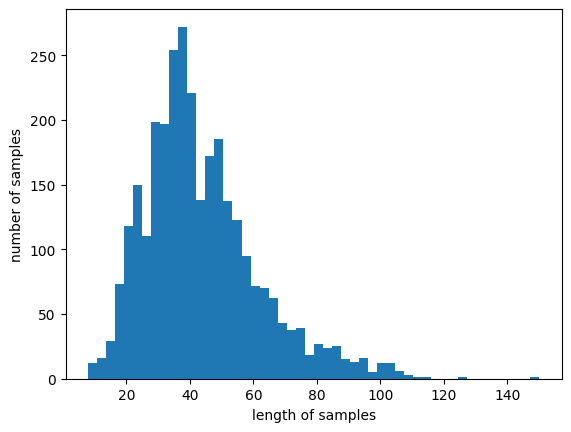

In [58]:
plt.hist([len(s) for s in data_tokenized], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [60]:
tokenizer = Tokenizer()

# fit_on_texts()안에 형태소 분석된 데이터를 입력으로 넣으면 빈도수를 기준으로 단어 집합을 생성
tokenizer.fit_on_texts(data_tokenized) 

In [61]:
tokenizer.word_counts

OrderedDict([('취소소송', 22),
             ('처분', 719),
             ('등', 949),
             ('것', 2626),
             ('안', 61),
             ('때', 584),
             ('로부터', 122),
             ('이내', 23),
             ('제기', 191),
             ('행정처분', 109),
             ('허가', 287),
             ('기한', 59),
             ('경우', 1657),
             ('조건', 85),
             ('존속', 40),
             ('기간', 286),
             ('보아', 209),
             ('그', 2243),
             ('도래', 13),
             ('개정', 71),
             ('고려', 112),
             ('해석', 155),
             ('수', 2253),
             ('사도', 7),
             ('개설', 43),
             ('준공', 36),
             ('검사', 92),
             ('못', 68),
             ('자체', 116),
             ('볼', 596),
             ('까닭', 3),
             ('실효', 23),
             ('항고소송', 19),
             ('대상', 343),
             ('일반', 92),
             ('국민', 42),
             ('권리', 290),
             ('의무', 380),
             ('직접', 132),
   

In [62]:
type(tokenizer.word_counts)

collections.OrderedDict

In [63]:
for key, val in tokenizer.word_counts.items() :
    if val == 1 :
        print(key)
        print(val)

양해각서
1
공헌
1
직할
1
정하나
1
내야
1
보호대
1
화랑
1
묘목
1
달함
1
추적
1
적성검사
1
사교
1
춤
1
지터
1
벅
1
당사자소송
1
유용
1
콘도미니엄
1
제일
1
김지
1
병기
1
유리창
1
선팅지
1
실상
1
폐해
1
모델하우스
1
플라스틱
1
파라솔
1
둘레
1
전화번호
1
현수막
1
교통법위반
1
우수현상광고
1
김포공항
1
납금
1
산일
1
쳥
1
선축
1
실천
1
환승
1
사잔
1
경찰권
1
핼로
1
품성
1
덕행
1
명성
1
인격권
1
수리시설
1
개보
1
보조사
1
부원
1
설득
1
속보
1
입국심사
1
영공
1
대기발령
1
편승
1
이직
1
예정일
1
전일
1
의견청취
1
적법절차
1
위험부담
1
특허심판원
1
정문화
1
단체교섭
1
계획재량
1
부지경
1
보통면
1
허소
1
지자
1
유력
1
복원성
1
국립공원
1
취락
1
콘크리트
1
서신
1
송수
1
홍보물
1
범람
1
과열
1
혼탁
1
이동전화
1
수천
1
휴대폰
1
낙
1
약자
1
급부의무
1
상대자
1
문과
1
전조등
1
온천
1
이유나
1
헌법불합치
1
이음
1
절연
1
안부
1
후배
1
구조조정
1
전화통화
1
직권남용죄
1
노동운동
1
외교
1
청사
1
옥외
1
중간자
1
결회
1
최선
1
결핵
1
약인
1
에탐부톨
1
보건소
1
완치
1
관절염
1
치환술
1
국립대
1
제자
1
소식지
1
만화영화
1
팽이
1
대중
1
흡인
1
고려대
1
고볼
1
수분
1
운칙적
1
간자
1
장애인
1
유료도로
1
북어
1
새우
1
음식재료
1
가전
1
지대
1
해치
1
간여
1
노무사
1
글
1
스레
1
기관지
1
특보
1
노동부
1
강제징수
1
수차
1
변호사비용
1
자유시장경제
1
부외
1
기기
1
모면
1
슬
1
권세
1
소규모
1
수백
1
공세
1
권부
1
차마
1
직진
1
오거
1
강구
1
전망
1
자비
1
공전자기록위작죄
1
공산품
1
원격조정기
1
부회
1
교리
1
겸비
1
차손일
1
카페
1
검문소
1
낮
1
기자
1
위법성조각사유
1
위세
1
폭력조직
1

In [64]:
vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size) 
tokenizer.fit_on_texts(data_tokenized)

In [65]:
data_index = tokenizer.texts_to_sequences(data_tokenized)

In [66]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

X_train, X_test, y_train, y_test = train_test_split(data_index, target, test_size=0.2, stratify=target, random_state=100)

In [67]:
max_len = 40

X_train = pad_sequences(X_train, maxlen=max_len) # 훈련용 판결요약문 패딩
X_test = pad_sequences(X_test, maxlen=max_len) # 테스트용 판결요약문 패딩

In [68]:
y_train = to_categorical(y_train) # 훈련용 판결요약문 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 판결요약문 레이블의 원-핫 인코딩


In [69]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(6, activation='softmax'))

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [71]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))


Epoch 1/30


2023-03-20 15:17:21.597775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-20 15:17:21.768680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-20 15:17:21.951356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 1.6039 - acc: 0.4037

2023-03-20 15:17:23.254234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-20 15:17:23.321799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.35275, saving model to best_model.h5
19/19 [==============================] - 2s 78ms/step - loss: 1.6039 - acc: 0.4037 - val_loss: 1.4471 - val_acc: 0.3527
Epoch 2/30
19/19 [==============================] - ETA: 0s - loss: 1.3236 - acc: 0.4370
Epoch 2: val_acc improved from 0.35275 to 0.53411, saving model to best_model.h5
19/19 [==============================] - 1s 40ms/step - loss: 1.3236 - acc: 0.4370 - val_loss: 1.1469 - val_acc: 0.5341
Epoch 3/30
19/19 [==============================] - ETA: 0s - loss: 0.9576 - acc: 0.6459
Epoch 3: val_acc improved from 0.53411 to 0.66556, saving model to best_model.h5
19/19 [==============================] - 1s 38ms/step - loss: 0.9576 - acc: 0.6459 - val_loss: 0.9921 - val_acc: 0.6656
Epoch 4/30
18/19 [===========================>..] - ETA: 0s - loss: 0.7429 - acc: 0.7539
Epoch 4: val_acc improved from 0.66556 to 0.70383, saving model to best_model.h5
19/19 [==============================] - 1s 45ms/st

In [72]:
loaded_model = load_model('best_model.h5')

In [73]:
history.history['loss']

[1.6039212942123413,
 1.3235834836959839,
 0.9575545787811279,
 0.7344311475753784,
 0.5614500045776367,
 0.42174407839775085,
 0.325774610042572,
 0.2739484906196594,
 0.23472677171230316,
 0.17997142672538757,
 0.14975304901599884,
 0.12689146399497986]

In [74]:
history.history['val_loss']

[1.4471455812454224,
 1.1468749046325684,
 0.9920653104782104,
 0.7968772053718567,
 0.6955264806747437,
 0.6556094884872437,
 0.6007599830627441,
 0.6624433994293213,
 0.6495925188064575,
 0.6611500978469849,
 0.6663338541984558,
 0.775693416595459]

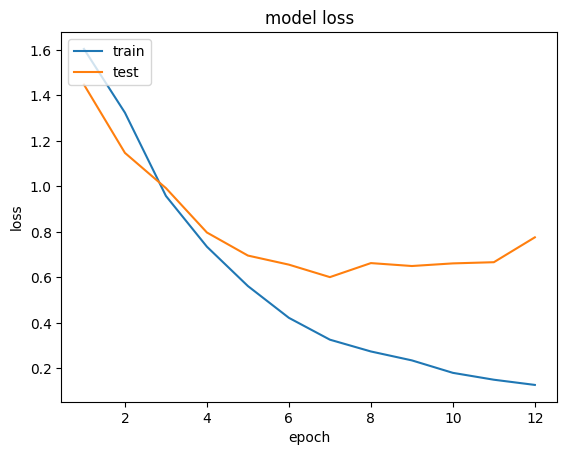

In [81]:
epochs = range(1, len(history.history['acc']) + 1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
plt.show()

In [84]:
epochs

range(1, 13)

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [78]:
pd.DataFrame(
    {
        "loss" : loss,
        "val_loss" : val_loss
    }
)

,loss,val_loss
0,1.603921,1.447146
1,1.323583,1.146875
2,0.957555,0.992065
3,0.734431,0.796877
4,0.561450,0.695526
5,0.421744,0.655609
6,0.325775,0.600760
7,0.273948,0.662443
8,0.234727,0.649593
9,0.179971,0.661150


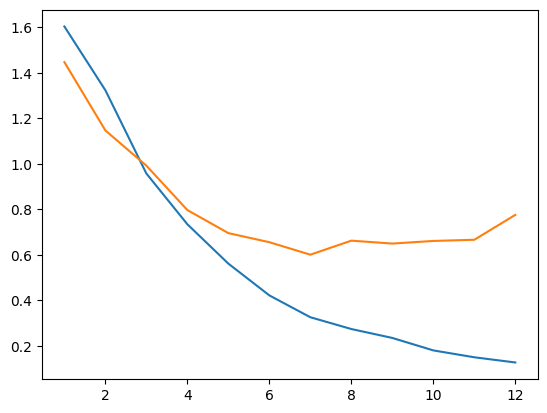

In [86]:
fig, ax = plt.subplots()
ax.plot(epochs, loss)
ax.plot(epochs, val_loss)